In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2|

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns
import pandas as pd

from util import fct_integrals as integrals
from util import tf_integrals as tf_integrals

from util import fct_mf as mf

fontsize= 14;

### Set parameters

Mm = 3.5      # Mean of m
Mn = 1.       # Mean of n
Mi = 0.       # Mean of I

Sim = 1.      # Std of m
Sin = 1.      # Std of n
Sip = 1.      # Std of input orthogonal to m and n, along h (see Methods)

g = 0.8
tol = 1e-10;

Sini_min = 1e-4
Sini_max = 2.
num_vals = 40;
Sini_values = np.linspace(Sini_min, Sini_max, num_vals)

In [2]:


ics_0 = np.array([5., 5., 5.], np.float64);
ics_1 = np.array([-5., 5., -5.], np.float64);
eps = 0.2;
eps_approx = 0.8;
tol_approx = .01;

Ks_valid = np.zeros((2,num_vals));
count_approx = np.zeros((2,num_vals));
for i in range(num_vals):
    Sini = Sini_values[i];
    ParVec = [Mm, Mn, Mi, Sim, Sin, Sini, Sip];
    
    ys, count = mf.SolveStatic(ics_0, g, ParVec, eps, tol);
    Ks_valid[0,i] = ys[-1,2];
    
    
    ys, count = mf.SolveStatic(ics_1, g, ParVec, eps, tol);
    Ks_valid[1,i] = ys[-1,2];    
    
print(Sini_values.shape);  
print(Ks_valid.shape)
num_its = 15;
variance = .05;
stddev = np.sqrt(variance);

(40,)
(2, 40)


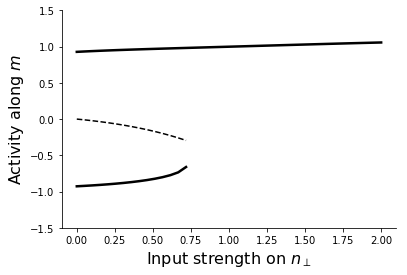

In [3]:

fig = plt.figure();
ax = fig.add_subplot(1,1,1);
plt.plot(Sini_values, Ks_valid[0], 'k', lw=2.5);
plt.plot(Sini_values[:num_its], -.2*Sini_values[:num_its]*np.exp(Sini_values[:num_its]), 'k--', lw=1.5);
plt.plot(Sini_values[:num_its], Ks_valid[1,:num_its], 'k', lw=2.5);

plt.ylim([-1.5, 1.5]);

plt.xlabel(r'Input strength on $n_\perp$', fontsize=fontsize+2);
plt.ylabel(r'Activity along $m$', fontsize=fontsize+2);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();




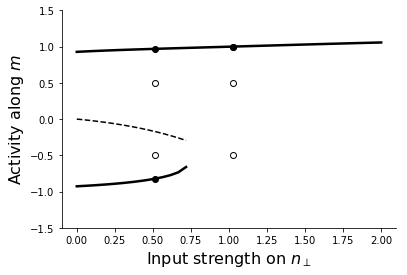

In [4]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1);
plt.plot(Sini_values, Ks_valid[0], 'k', lw=2.5);
plt.plot(Sini_values[:num_its], -.2*Sini_values[:num_its]*np.exp(Sini_values[:num_its]), 'k--', lw=1.5);
plt.plot(Sini_values[:num_its], Ks_valid[1,:num_its], 'k', lw=2.5);

init_conds_x = [Sini_values[10], Sini_values[10], Sini_values[20], Sini_values[20]];
init_conds_y = [0.5, -0.5, 0.5, -0.5];

conv_x = [Sini_values[10], Sini_values[10], Sini_values[20], Sini_values[20]];
conv_y = [Ks_valid[0,10], Ks_valid[1,10], Ks_valid[0,20], Ks_valid[1,20]];

plt.plot(init_conds_x, init_conds_y, 'ko', mfc='none');
plt.plot(conv_x, conv_y, 'ko');

plt.ylim([-1.5, 1.5]);

plt.xlabel(r'Input strength on $n_\perp$', fontsize=fontsize+2);
plt.ylabel(r'Activity along $m$', fontsize=fontsize+2);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();


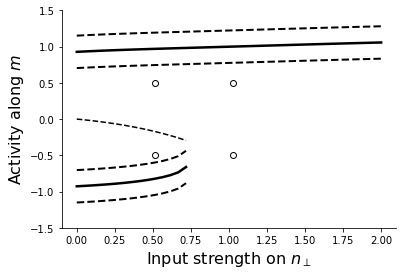

In [5]:
fig = plt.figure();
ax = fig.add_subplot(1,1,1);
plt.plot(Sini_values, Ks_valid[0], 'k', lw=2.5);
plt.plot(Sini_values, Ks_valid[0]-stddev, 'k--', lw=2);
plt.plot(Sini_values, Ks_valid[0]+stddev, 'k--', lw=2);

plt.plot(Sini_values[:num_its], Ks_valid[1,:num_its], 'k', lw=2.5);
plt.plot(Sini_values[:num_its], Ks_valid[1,:num_its]-stddev, 'k--', lw=2);
plt.plot(Sini_values[:num_its], Ks_valid[1,:num_its]+stddev, 'k--', lw=2);

plt.plot(Sini_values[:num_its], -.2*Sini_values[:num_its]*np.exp(Sini_values[:num_its]), 'k--', lw=1.5);


init_conds_x = [Sini_values[10], Sini_values[10], Sini_values[20], Sini_values[20]];
init_conds_y = [0.5, -0.5, 0.5, -0.5];


plt.plot(init_conds_x, init_conds_y, 'ko', mfc='none');

plt.ylim([-1.5, 1.5]);

plt.xlabel(r'Input strength on $n_\perp$', fontsize=fontsize+2);
plt.ylabel(r'Activity along $m$', fontsize=fontsize+2);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show();
